# Simple Classification Machine Learning Example
With the vast amount of data at our disposal we are all looking for ways to use it to our advantage. In the recent years, machine learning algorithms have taken us by storm and are becoming household items in fields ranging from medicine, speech recognition and video games, to name a few. Even though it may sound daunting at first, getting actionable insights from data with the help of machine learning doesn’t have to be on par with developing rockets or baking the perfect soufflé.

In this workshop we will explore ways to utilize machine learning in a simple way without needing any prior knowledge of the field or what is happening behind the scenes.  

Tho, some requirenments are needed. You will need to have a working jupyter notebook environment as well as the following pip packages: 
    - pandas
    - matplotlib
    - scikit-learn 
I would recommend using Visual Studio Code. Once, this is all set up you are ready to go. 

## Data Gathering: A Classic - The Iris Dataset
For this tutorial we are gonna use the Iris Dataset. This is a very common dataset used to learn the important concepts of ML classification. The dataset holds data about three different iris species including some properties of each flower. 
Source: https://www.kaggle.com/datasets/uciml/iris 

In [63]:
# importing pandas for data preprocession and csv handling
import pandas as pd

# Note we will use the following acronyms in our variables: 
# df = data frame - commonly used for pandas data frames 

# loading our iris dataset into a pandas dataframe
iris_df = pd.read_csv("data/iris_data.csv")

# printing out the the first 5 rows of our data and have a look 
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
# print the shape of the df (rows, columns)
iris_df.shape

(150, 6)

### _Exercise 1: Explore Data_
In this exercise you can start exploring the data. To get you started you can use the following methods: 
- ``info``
- ``value_counts``
- ``describe``

I would also recommend having a look at the pandas documentation: https://pandas.pydata.org/docs/reference/index.html 

In [65]:
# Excercise 1: Put your code here 
print(f'Excercise 1')

Excercise 1


In [66]:
# Once done with Excercise 1 continue here 

# changing the data type of species to category
iris_df["Species"] = iris_df.Species.astype("category")
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             150 non-null    int64   
 1   SepalLengthCm  150 non-null    float64 
 2   SepalWidthCm   150 non-null    float64 
 3   PetalLengthCm  150 non-null    float64 
 4   PetalWidthCm   150 non-null    float64 
 5   Species        150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


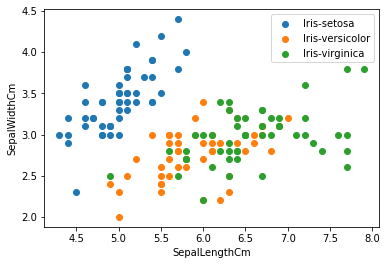

In [67]:
# import matplotlib
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()

# creating subplots per species 
for cat in iris_df['Species'].cat.categories: 
    ax.scatter(x=iris_df['SepalLengthCm'][iris_df.Species==cat], y=iris_df['SepalWidthCm'][iris_df.Species==cat], label=cat)

# adding labels and legend
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
# plotting SepalLengthCm vs SepalWidthCm as scatterplot per species 
plt.show()


### _Exercise 2: Plot Data_
In this second excercise plot the data again, but this time use _PetalLengthCm_ and _PetalWidthCm_. 

I would also recommend having a look at the matplotlib documentation: https://matplotlib.org/devdocs/api/index.html 

In [68]:
# Excercise 2: Put your code here 
print(f'Excercise 2')

Excercise 2


## Data Pre-Processing
In this step you would do all data pre-processing necassary. That can include a wide range of things ranging from feature selection to feature engineering. In our case we only want to drop the ``Id`` column as it is not an actual property of the flowers. Further, we will split our whole dataset into a training and test dataset. The training dataset will be used to train our model and the test dataset will be used in the evaluation of the performance of our model. 

In [69]:
# remember our current columns 
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [70]:
# now dropping the id column as that is not an actual property of the class
iris_df = iris_df.drop(columns='Id')
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [71]:
# import sklearns capability to split the dataset into train and test
from sklearn.model_selection import train_test_split

# splitting the iris dataset into train (70%) and test (30%)
train_df, test_df = train_test_split(iris_df, test_size=0.3)
print(f'train shape={train_df.shape} and test shape={test_df.shape}')

train shape=(105, 5) and test shape=(45, 5)


In [72]:
# seperate features from labels for the train and test dataset 
train_df_features = train_df.drop(columns='Species')
train_df_labels = train_df.Species
print(f'train df features: {train_df_features.shape}')
print(train_df_features.head(2))
print(f'\ntrain df labels: {train_df_labels.shape}')
print(train_df_labels.head(2))

# seperate features from labels for the train and test dataset 
test_df_features = test_df.drop(columns='Species')
test_df_labels = test_df.Species
print(f'\ntest df features: {test_df_features.shape}')
print(test_df_features.head(2))
print(f'\ntest df labels: {test_df_labels.shape}')
print(test_df_labels.head(2))

train df features: (105, 4)
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
24            4.8           3.4            1.9           0.2
7             5.0           3.4            1.5           0.2

train df labels: (105,)
24    Iris-setosa
7     Iris-setosa
Name: Species, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

test df features: (45, 4)
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
119            6.0           2.2            5.0           1.5
20             5.4           3.4            1.7           0.2

test df labels: (45,)
119    Iris-virginica
20        Iris-setosa
Name: Species, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


## Model Training and Evaluation 
In the model training step we finally train a machine learning model. Yay! Deciding on which algorithm to use can be sometimes a little tricky and usually you go through iterations and try different ones. In the following we will train three different models and compare them: LogisitcRegression, a DecisionTrer an K-Nearest Neighbour. 
The steps are the same fore all models: 
1. Train the model with the training dataset using the ``.fit()``-method 
2. [Optional] Predict the outcome of the trained model with the test dataset using the ``.predict()``-method 
3. Evaluate the performance of the model by comparing the predicted outcome with the actual outcome 

Note: we will use accuracy as the evaluation metric. However, there are many different metrics you can evalute a model against and might be better suited for the problem at hand. 

### Logistic Regression

In [73]:
# importing logistic regression from sklearn 
from sklearn.linear_model import LogisticRegression

# Note we will use the following acronyms in our variables: 
# clf = classifier
# lr = logisitc regression 
# dt = decision tree 
# knn = k-nearest neighbour
# pred = prediction 

# creating a logistic regression model 
clf_lr = LogisticRegression(max_iter=200)
# training the model on our train dataset 
clf_lr.fit(train_df_features, train_df_labels)
# printing out the mean accuracy score
print(f'Logistic Regression Accuracy: {clf_lr.score(test_df_features, test_df_labels)}')

Logistic Regression Accuracy: 0.9333333333333333


In [74]:
# some classification models in sklearn can also return the probability of the class prediction 
pred_lr_probabilities = clf_lr.predict_proba(test_df_features)
pred_lr_probabilities_df = pd.DataFrame(pred_lr_probabilities, columns=iris_df['Species'].cat.categories).applymap("{0:.2f}".format)
pred_lr_probabilities_df.assign(prediction=clf_lr.predict(test_df_features)).head()

,Iris-setosa,Iris-versicolor,Iris-virginica,prediction
0,0.00,0.55,0.45,Iris-versicolor
1,0.94,0.06,0.00,Iris-setosa
2,0.00,0.04,0.96,Iris-virginica
3,0.00,0.85,0.14,Iris-versicolor
4,0.99,0.01,0.00,Iris-setosa


### _Exercise 3: Decision Tree_
Now, let's train a decision tree model! 

I would also recommend having a look at the sciit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier 

In [75]:
# importing decision tree classifier from sklearn 
from sklearn.tree import DecisionTreeClassifier

# Excercise 3: Put your code here and print out the accuracy
print(f'Excercise 3')

Excercise 3


### _Exercise 4: K-Nearest Neighbour_
Now, let's train a k-nearest neighbour model! 

I would also recommend having a look at the sciit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [76]:
# importing nearest neighbour classifier from sklearn 
from sklearn.neighbors import KNeighborsClassifier

# Excercise 4: Put your code here and print out the accuracy
print(f'Excercise 4')

Excercise 4


## Model Inference 
Once we selected our best performing model based on the metric we chose we can now use it to predict outcomes on new unlabelled data. That means we are gonna take the trained model and use the ``.predict()``-method to get the predictions. 

As we don't have any new data in this example - so let's just shuffle the original iris dataset and use that. 

In [77]:
shuffled_iris_df = iris_df.sample(frac=1)
inference = clf_lr.predict(shuffled_iris_df.drop(['Species'], axis=1))
shuffled_iris_df.assign(prediction=inference).head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,prediction
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
29,4.7,3.2,1.6,0.2,Iris-setosa,Iris-setosa
138,6.0,3.0,4.8,1.8,Iris-virginica,Iris-versicolor
121,5.6,2.8,4.9,2.0,Iris-virginica,Iris-virginica
67,5.8,2.7,4.1,1.0,Iris-versicolor,Iris-versicolor
127,6.1,3.0,4.9,1.8,Iris-virginica,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica,Iris-virginica


### _Exercise 5: Model Inference for K-Nearest Neighbour_
In this final exercise use the k-nearest neighbour model you trained in Exercise 4 to predict their labels. 

In [78]:
# Excercise 5: Put your code here and print out the accuracy
print(f'Excercise 5')

Excercise 5
